# Exploring the Theory Behind Sunspots: Part 2

In [1]:
# Importing the required libraries/modules

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerLine2D

In [2]:
# Modeling a sunspot as traveling across a unit circle

t = np.linspace(0, 1, num=18)
theta = np.linspace(0, np.pi, 18)
r = 1.
x = np.cos(theta)*r

# Shift the x values to all be positive and always increasing to be consistent with the images

shiftx = []
for i in x:
    if i < 0:
        shiftx.append(r+abs(i))
    else:
        shiftx.append(r-abs(i))
        
shiftx = np.asarray(shiftx)

In [3]:
# Prints the polyfit data - changing j changes the number of points supplied to the fit,
# which changes the goodness of the fit

print('Polyfit power 3 All data')
print(np.polyfit(t, shiftx, 3, full=True))

j = 8

print('\n x up to entry {}'.format(j))
print(shiftx[:j])
print('\n Polyfit power 3 with cut x data from start')
print(np.polyfit(t[:j], shiftx[:j], 3, full=True))
print('\n Polyfit power 2 with cut x data from start')
print(np.polyfit(t[:j], shiftx[:j], 2, full=True))
print('\n Polyfit power 1 with center data only')
print(np.polyfit(t[7:-7], shiftx[7:-7], 1, full=True))

Polyfit power 3 All data
(array([-4.43670065e+00,  6.65505098e+00, -2.27827781e-01,  4.73872779e-03]), array([0.00020312]), 4, array([1.88892799, 0.63427907, 0.17040661, 0.0245499 ]), 3.9968028886505635e-15)

 x up to entry 8
[0.         0.0170269  0.06752777 0.14978286 0.26099108 0.39736536
 0.55426164 0.72633701]

 Polyfit power 3 with cut x data from start
(array([-3.03095447e+00,  5.66879499e+00, -5.64012530e-02,  4.66158186e-04]), array([2.61624145e-06]), 4, array([1.88489601, 0.64292086, 0.18195416, 0.02669254]), 1.7763568394002505e-15)

 Polyfit power 2 with cut x data from start
(array([ 3.79673488,  0.23201137, -0.00601156]), array([0.00022869]), 3, array([1.64022192, 0.54419077, 0.11631192]), 1.7763568394002505e-15)

 Polyfit power 1 with center data only
(array([ 3.10507492, -0.55253746]), array([1.9745438e-06]), 2, array([1.41119103, 0.0924114 ]), 8.881784197001252e-16)


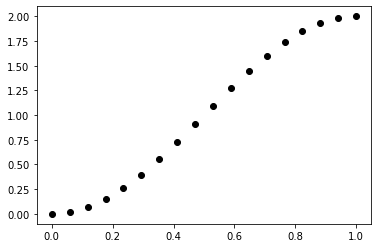

In [4]:
# Plots the change in x of the sunspot over time

fig = plt.figure(1)
plt.scatter(t, shiftx, color='k', zorder=1)
plt.show()

In [5]:
# Creates a cubic regression

p, res, rank, sing, rcond = np.polyfit(t, shiftx, 3, full=True)

# Creates a quadratic regression

p2 = np.polyfit(t, shiftx, 2)

# Creates a linear regression

p3 = np.polyfit(t, shiftx, 1)

# Creates a linear regression centered on the inner x values of the sunspot

p4 = np.polyfit(t[7:-7], shiftx[7:-7], 1)

# Creating functions of t using each of the above regressions

theory = p[0]*t**3 + p[1]*t**2 + p[2]*t +p[3]
theory2 = p2[0]*t**2 + p2[1]*t +p2[2]
theory3 = p3[0]*t + p3[1]
theory4 = p4[0]*t + p4[1]

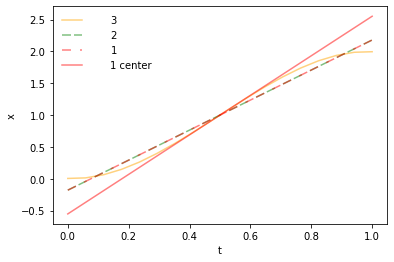

In [6]:
# Plots each regression

plt.plot(t, theory, '-', color='orange', alpha=.5, zorder=0, label='3')
plt.plot(t, theory2, '--', color='g', alpha=.5, zorder=0, dashes=[6,2,6,6], label='2')
plt.plot(t, theory3, '--', color='r', alpha=.5, zorder=0, dashes=[6,6,6,2], label='1')
plt.plot(t, theory4, '-', color='r', alpha=.5, zorder=0, label='1 center')
plt.xlabel('t')
plt.ylabel('x')
legend = plt.legend(handlelength=2, frameon=False)

# Shifts the legend text to center aligned

renderer = fig.canvas.get_renderer()
shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])/2
for text in legend.get_texts():
    text.set_ha('center')
    text.set_position((shift,0))
    
plt.show()

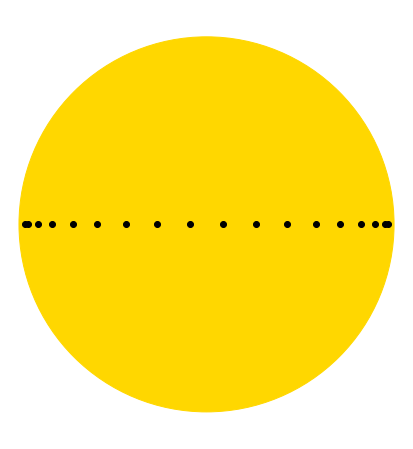

In [7]:
# Plots the approximate path of the sunspot on the face of the Sun using its x values

fig = plt.figure(2,figsize=(8,8))
ax = fig.add_subplot()
circle = plt.Circle((1,1), 1.035, color='gold', zorder=0)
ax.add_artist(circle)
ax.scatter(shiftx, np.ones(len(shiftx)), color='k', zorder=1)
ax.set_ylim(-.2,2.2)
ax.set_aspect('equal')
ax.axis('off')

plt.show()

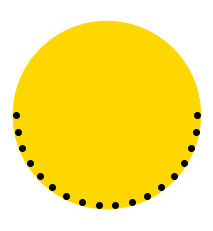

In [8]:
# Top view of the figure above

fig = plt.figure(3)
ax = fig.add_subplot()
circle = plt.Circle((1,2), 1.035, color='gold', zorder=0)
ax.add_artist(circle)

# Shifts the dots to the circumference of the circle

x2 = 1 + np.cos(theta)*r
y2 = 2 - np.sin(theta)*r


ax.scatter(x2, y2, color='k', zorder=1)
ax.set_ylim(0.8,3.2)
ax.set_aspect('equal')
ax.axis('off')

plt.show()

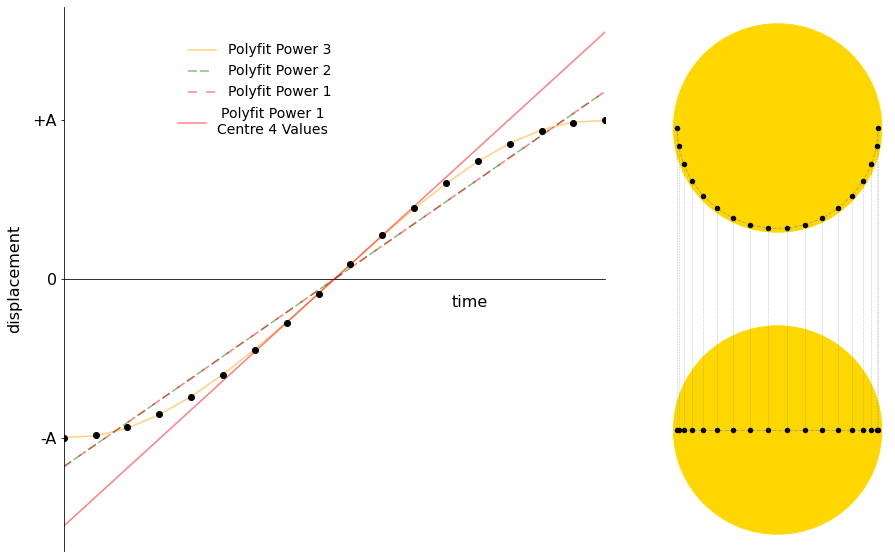

In [10]:
# Creating a plot to show all regressions with the path of the sunspots as well

fig = plt.figure(4, figsize=(15,10))
G = gridspec.GridSpec(1,3)
ax1 = plt.subplot(G[0:2])
ax2 = plt.subplot(G[2])

# Plotting the regressions

ax1.scatter(t, shiftx-1, color='k', zorder=1)
ax1.plot(t, theory-1, '-', color='orange', alpha=.5, zorder=0, label='Polyfit Power 3')
ax1.plot(t, theory2-1, '--', color='g', alpha=.5, zorder=0, dashes=[6,2,6,6], label='Polyfit Power 2')
ax1.plot(t, theory3-1, '--', color='r', alpha=.5, zorder=0, dashes=[6,6,6,2], label='Polyfit Power 1')
ax1.plot(t, theory4-1, '-', color='r', alpha=.5, zorder=0, label='Polyfit Power 1\nCentre 4 Values')
ax1.set_xlabel('time', fontsize=16)
ax1.set_ylabel('displacement', labelpad=10, fontsize=16)

# Removing tick marks and the lines on the top, bottom, and right sides of the plot

ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', which='both', bottom=False)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_yticks([-1,0,1])
ax1.set_yticklabels(['-A', 0, '+A'])

ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.set_xlim(0, 1)
ax1.xaxis.set_label_coords(0.75, 0.47) 

# Creating legends: One for the first 3 fits, another for the 4th fit

h, l = ax1.get_legend_handles_labels()
kw = dict(frameon=False, fontsize=14, handlelength=2)    
leg1 = ax1.legend(h[:3],l[:3], loc=(0.22, .82),**kw)
leg2 = ax1.legend(h[3:],l[3:], loc=(0.2, .75),**kw)
plt.setp(leg2.get_texts(), multialignment='center')
ax1.add_artist(leg1)

# Creating a diagram to show the transformation of the sunspots in circular motion
# to the sunspots in simple harmonic motion

size = 20
circle1 = plt.Circle((1,1), 1.035, color='gold', zorder=0, clip_on=False)
ax2.add_artist(circle1)
ax2.scatter(shiftx, np.ones(len(shiftx)), color='k', zorder=2, s=size)
ax2.plot(shiftx, np.ones(len(shiftx)), '--', color='grey', zorder=1, alpha=.5, linewidth=1)

circle2 = plt.Circle((1,2+2), 1.035, color='gold', zorder=0, clip_on=False)
ax2.add_artist(circle2)
y2off = y2+2
ax2.scatter(x2, y2off, color='k', zorder=2, s=size)
ax2.plot(x2, y2off, '--', color='grey', zorder=1, alpha=.5, linewidth=1)

# Creating the vertical lines seen in the right side of the diagram

for i in range(len(shiftx)):
    ax2.vlines(shiftx[i], 1, y2off[i], colors='grey', linestyles='dashed', alpha=.5, linewidth=.5)
ax2.set_ylim(-.2, 5.2)
ax2.set_aspect('equal')
ax2.axis('off')

plt.show()

In this image, we can see the path of a sunspot on the left if its displacement is plotted on the y axis (displacment from the axis of rotation). This shows that the third order fit is best and a first order fit is only accurate when the sunspot is near the rotation axis of the Sun.

On the right, at the top is the top-down view of the Sun showing the circular motion of a sunspot, and on the bottom is the face of the Sun as we see it showing the sunspot in simple harmonic motion.